In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [38]:
df.shape

(3276, 10)

In [39]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [40]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [41]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [42]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

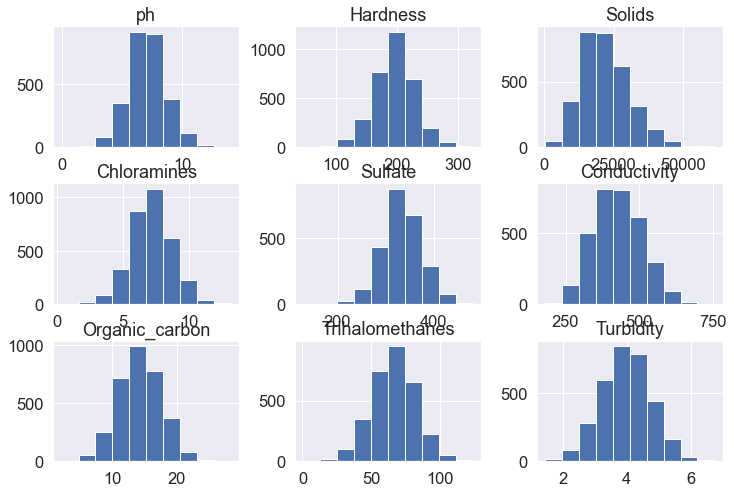

In [43]:
df.drop('Potability', axis=1).hist(figsize=(12,8))

In [44]:
# split into train test sets
train, test = train_test_split(df,test_size=0.2,random_state= 20)

In [45]:
train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
2494,6.039823,164.026340,9943.637599,7.723305,350.756261,374.794719,16.668446,65.542662,3.923766,0
2313,NaN,144.995790,16219.475320,5.563067,379.962973,374.543069,11.118073,72.290773,4.904367,1
1907,7.369989,236.476721,18998.346823,7.404435,359.930566,357.066203,18.020331,58.271257,3.463852,1
2170,NaN,162.512684,24642.812333,7.267573,330.905370,414.650725,11.583353,73.946186,3.215740,0
...,...,...,...,...,...,...,...,...,...,...
1428,8.268308,168.687890,13181.673516,6.383226,298.307093,294.298065,12.366424,79.206473,4.405408,0
2441,6.304769,213.656178,30168.606596,5.210780,NaN,339.116587,14.947676,43.576389,5.109935,1
2972,7.948488,197.594542,23602.187832,7.098458,NaN,394.767989,14.876694,78.974227,3.891124,0
271,7.275909,175.220376,22644.766348,7.886855,293.309854,373.345693,17.411683,56.799287,5.062298,1


In [46]:
train.shape

(2620, 10)

In [47]:
train.isnull().sum()

ph                 395
Hardness             0
Solids               0
Chloramines          0
Sulfate            614
Conductivity         0
Organic_carbon       0
Trihalomethanes    124
Turbidity            0
Potability           0
dtype: int64

In [48]:
train.isnull().mean()*100 

ph                 15.076336
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.435115
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.732824
Turbidity           0.000000
Potability          0.000000
dtype: float64

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

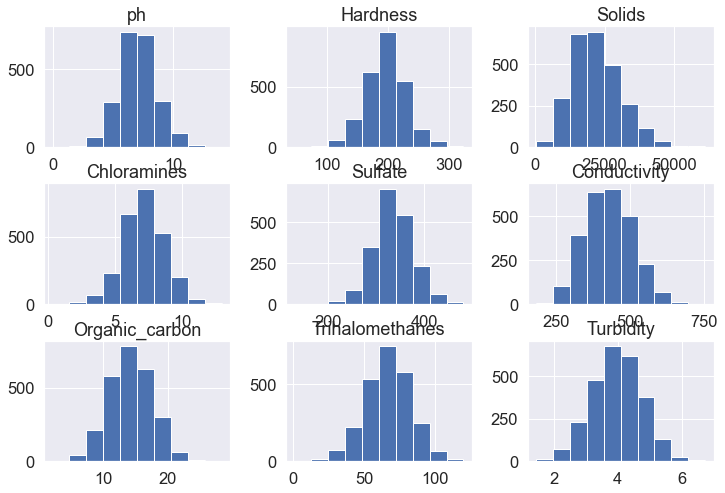

In [49]:
train.drop('Potability', axis=1).hist(figsize=(12,8))

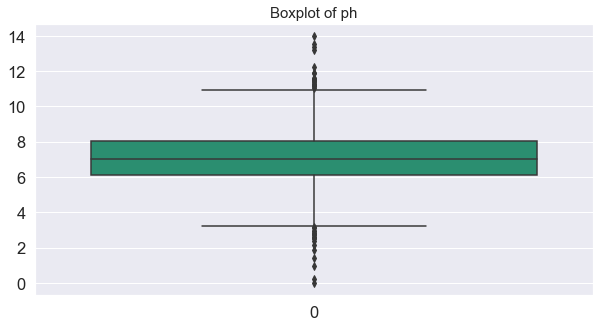

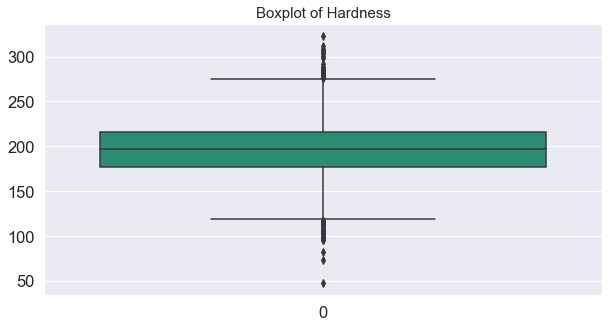

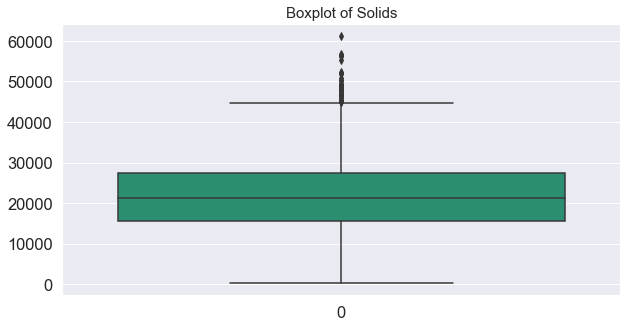

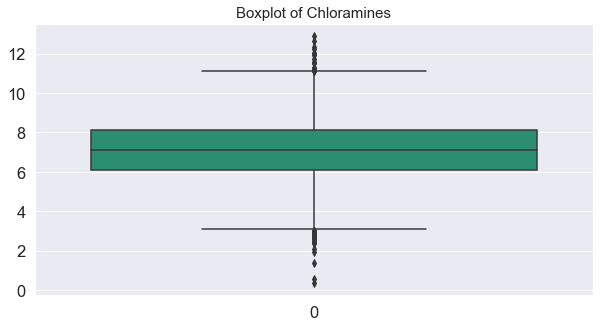

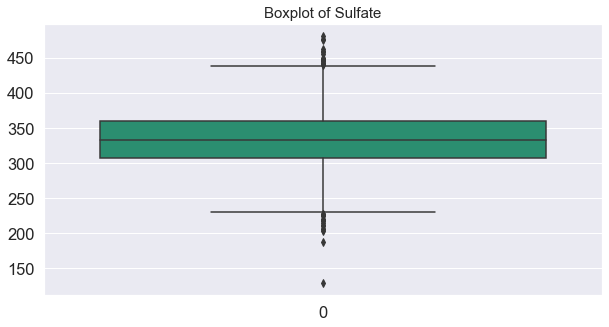

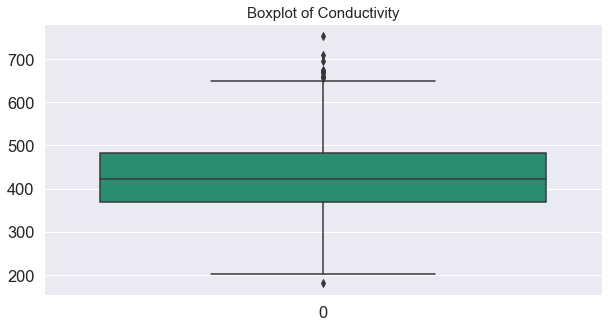

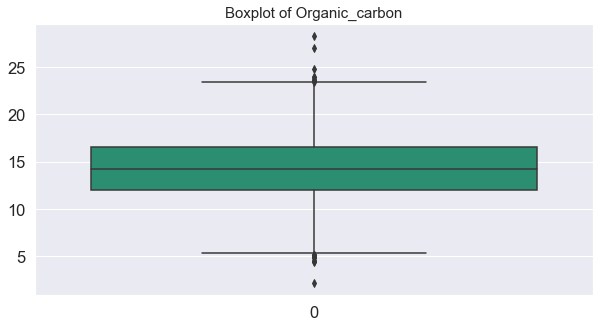

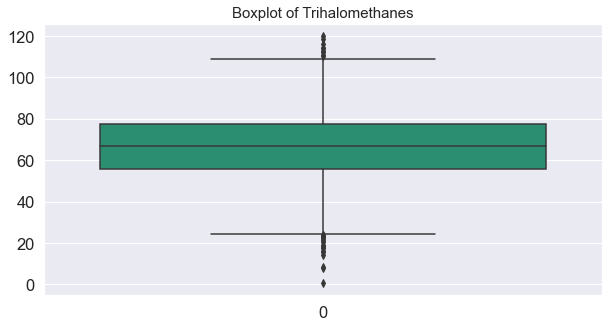

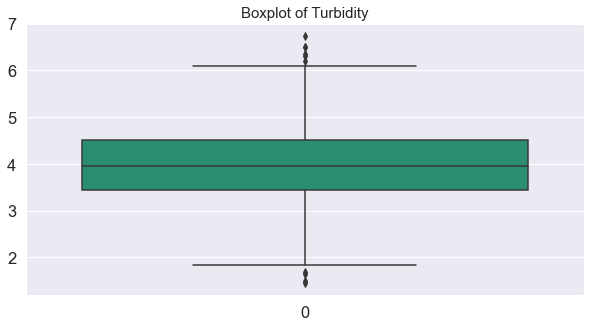

In [50]:
# All independent varibles are approximately normally distributed
for column in train.drop('Potability', axis=1).columns:
    #print(column)
    plt.figure(figsize=(10,5))
    plt.title("Boxplot of "+ column, fontsize=15)
    sns.boxplot(data = train[column], palette="Dark2")
    plt.show()
    #train[column].boxplot(figsize=(12,8))

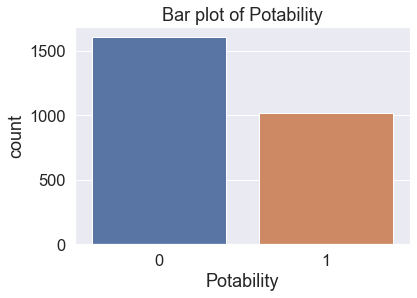

<Figure size 720x720 with 0 Axes>

In [51]:
sns.countplot(data=train,x='Potability')
plt.title('Bar plot of Potability')
plt.figure(figsize=(10,10))
plt.show()

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

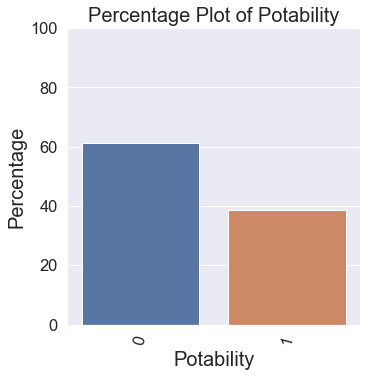

In [52]:
potability_df = train['Potability'].value_counts()
#potability_df = potability_df.mul(100).rename('Percent').reset_index()
#potability_df['percent'] = 
value0 = (potability_df[0] /(potability_df[0] + potability_df[1]))*100
value1 = (potability_df[1] /(potability_df[0] + potability_df[1]))*100
#print(value0)
#print(value1)
potability_df['percent'] = [value0,value1]
new_df = pd.DataFrame({'index':[0,1],'percent':[value0,value1]})
#new_df
sns.set(font_scale=1.5)
g = sns.catplot(x='index', y='percent', kind='bar', data=new_df)
g.ax.set_ylim(0,100)
plt.title('Percentage Plot of Potability', 
              fontdict={'fontsize': 20})
plt.xlabel('Potability', fontdict={'fontsize': 20})
plt.ylabel('Percentage', fontdict={'fontsize': 20})
plt.xticks(rotation=75)

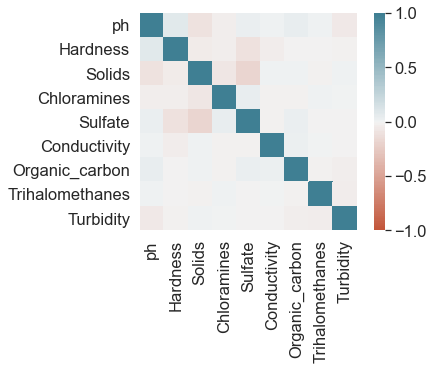

In [53]:
corr = train.drop('Potability', axis=1).corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [54]:
#impute mean for the train data

train['ph'] = train['ph'].fillna(train['ph'].mean())
test['ph'] = test['ph'].fillna(train['ph'].mean())
train['Sulfate'] = train['Sulfate'].fillna(train['Sulfate'].mean())
test['Sulfate'] = test['Sulfate'].fillna(train['Sulfate'].mean())
train['Trihalomethanes'] = train['Trihalomethanes'].fillna(train['Trihalomethanes'].mean())
test['Trihalomethanes'] = test['Trihalomethanes'].fillna(train['Trihalomethanes'].mean())

C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

# changing variables

According to INFORMATION ON DRINKING WATER QUALITY OF THE INSTITUTE, hardness can be classified as: <br/>

mg/l or ppm                        <br/>

Soft                          0 - 17.1  <br/>                                       
Slightly hard            17.1 - 60           <br/>     
Moderately hard      60 - 120                <br/>
Hard                       120 - 180              <br/>                         
Very hard               180 & over    

In [55]:
train = train.reset_index()

In [58]:
test = test.reset_index()

In [60]:
train["Type of Hardness"] = ""
for i in range(0,len(train)):
    if ((train.loc[i,"Hardness"] >=0) and (train.loc[i,"Hardness"]  < 17.1)):
        train.loc[i,"Type of Hardness"] = "Soft"
    elif ((train.loc[i,"Hardness"] >= 17.1) and (train.loc[i,"Hardness"] < 60)):
        train.loc[i,"Type of Hardness"] = "Slightly hard"
    elif ((train.loc[i,"Hardness"] >= 60) and (train.loc[i,"Hardness"] < 120 )):
        train.loc[i,"Type of Hardness"]  = "Moderately hard"   
    elif((train.loc[i,"Hardness"] >= 120) and (train.loc[i,"Hardness"]< 180)):
        train.loc[i,"Type of Hardness"]  = "Hard"
    else:
         train.loc[i,"Type of Hardness"]  = "Very Hard"

In [61]:
test["Type of Hardness"] = ""
for i in range(0,len(test)):
    if (test["Hardness"][i] >=0  and test["Hardness"][i] < 17.1):
        test["Type of Hardness"][i] = "Soft"
    elif (test["Hardness"][i] >= 17.1 and test["Hardness"][i] < 60):
        test["Type of Hardness"][i] = "Slightly hard"
    elif (test["Hardness"][i] >= 60 and test["Hardness"][i] < 120 ):
        test["Type of Hardness"][i] = "Moderately hard"   
    elif(test["Hardness"][i] >= 120 and test["Hardness"][i] < 180):
        test["Type of Hardness"][i] = "Hard"
    else:
         test["Type of Hardness"][i] = "Very Hard"

C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [80]:
train =train.drop(['Type of water_solid','Hardness'],axis=1)
test  = test.drop(['Type of water_solid','Hardness'],axis=1)

In [82]:
test

,ph,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type of Hardness
0,5.800034,13028.688458,6.106765,374.357784,405.517220,15.773825,35.338133,4.074408,1,Very Hard
1,6.848033,6068.454885,6.132132,373.206834,442.786267,11.118171,64.027600,4.257038,0,Hard
2,7.065913,27776.180257,7.589869,298.226719,417.631202,8.630091,72.923289,3.807920,1,Very Hard
3,6.519848,14284.647917,8.389078,373.091575,495.417954,11.638475,58.661649,3.272286,0,Very Hard
4,5.499788,43195.473668,6.570596,322.516582,287.286057,11.230408,71.821281,3.668220,0,Hard
...,...,...,...,...,...,...,...,...,...,...
651,7.065913,25703.155201,7.287310,333.840808,311.093065,10.238271,42.075315,1.659799,1,Hard
652,5.893103,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1,Very Hard
653,7.065913,20557.240432,8.187319,333.840808,290.180983,16.622255,59.622057,4.089908,0,Hard
654,6.492639,14625.561363,7.736570,349.404057,652.537592,10.212058,56.949724,4.667770,0,Hard


In [83]:
#One Hot Encoding of Categorical Columns
train = pd.get_dummies(train, columns = ['Type of Hardness'])
train.head()

,ph,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type of Hardness_Hard,Type of Hardness_Moderately hard,Type of Hardness_Slightly hard,Type of Hardness_Very Hard
0,7.065913,10643.186771,6.828936,333.840808,384.597711,16.011328,72.911573,3.065910,1,0,0,0,1
1,6.039823,9943.637599,7.723305,350.756261,374.794719,16.668446,65.542662,3.923766,0,1,0,0,0
2,7.065913,16219.475320,5.563067,379.962973,374.543069,11.118073,72.290773,4.904367,1,1,0,0,0
3,7.369989,18998.346823,7.404435,359.930566,357.066203,18.020331,58.271257,3.463852,1,0,0,0,1
4,7.065913,24642.812333,7.267573,330.905370,414.650725,11.583353,73.946186,3.215740,0,1,0,0,0


In [84]:
#One Hot Encoding of Categorical Columns
test = pd.get_dummies(test, columns = ['Type of Hardness'])
test.head()

,ph,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type of Hardness_Hard,Type of Hardness_Moderately hard,Type of Hardness_Very Hard
0,5.800034,13028.688458,6.106765,374.357784,405.517220,15.773825,35.338133,4.074408,1,0,0,1
1,6.848033,6068.454885,6.132132,373.206834,442.786267,11.118171,64.027600,4.257038,0,1,0,0
2,7.065913,27776.180257,7.589869,298.226719,417.631202,8.630091,72.923289,3.807920,1,0,0,1
3,6.519848,14284.647917,8.389078,373.091575,495.417954,11.638475,58.661649,3.272286,0,0,0,1
4,5.499788,43195.473668,6.570596,322.516582,287.286057,11.230408,71.821281,3.668220,0,1,0,0


In [85]:
test['Type of Hardness_Slightly hard'] = 0
test.head()

,ph,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Type of Hardness_Hard,Type of Hardness_Moderately hard,Type of Hardness_Very Hard,Type of Hardness_Slightly hard
0,5.800034,13028.688458,6.106765,374.357784,405.517220,15.773825,35.338133,4.074408,1,0,0,1,0
1,6.848033,6068.454885,6.132132,373.206834,442.786267,11.118171,64.027600,4.257038,0,1,0,0,0
2,7.065913,27776.180257,7.589869,298.226719,417.631202,8.630091,72.923289,3.807920,1,0,0,1,0
3,6.519848,14284.647917,8.389078,373.091575,495.417954,11.638475,58.661649,3.272286,0,0,0,1,0
4,5.499788,43195.473668,6.570596,322.516582,287.286057,11.230408,71.821281,3.668220,0,1,0,0,0


In [92]:
# Using .loc[] to all columns except Duration column

X_train = train.loc[:,train.columns != 'Potability']
Y_train = train.loc[:,'Potability']

In [96]:
X_test = test.loc[:,train.columns != 'Potability']
Y_test = test.loc[:,'Potability']

# Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [100]:
params = {
    'max_depth': [2, 3, 4, 5,6,7,8,9,10],
    'min_samples_leaf': [5, 8, 12, 15, 20],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_split' : [0.01,0.05,0.1]
}

In [101]:
clf_TUNED = DecisionTreeClassifier(random_state=20)

In [102]:
grid_search = GridSearchCV(estimator=clf_TUNED, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [103]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 8, 12, 15, 20],
                         'min_samples_split': [0.01, 0.05, 0.1]},
             scoring='accuracy', verbose=1)

In [104]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 12,
 'min_samples_split': 0.01}

In [105]:
grid_search.best_score_

0.6297709923664122

##### Use the best tuned paramater and fit the model again

In [113]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [107]:
DT_clf = DecisionTreeClassifier(max_depth = 6, max_features = 'auto', min_samples_leaf = 12, min_samples_split=0.01,random_state=20)

In [108]:
DT_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=12,
                       min_samples_split=0.01, random_state=20)

In [109]:
Y_pred = DT_clf.predict(X_test)

In [110]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score: 0.5808


In [111]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5080012384020743

In [114]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[344  49]
 [226  37]]
              precision    recall  f1-score   support

           0       0.60      0.88      0.71       393
           1       0.43      0.14      0.21       263

    accuracy                           0.58       656
   macro avg       0.52      0.51      0.46       656
weighted avg       0.53      0.58      0.51       656



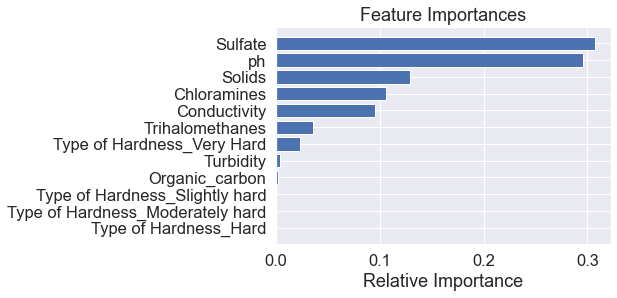

In [115]:
features = X_train.columns
importances = DT_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<AxesSubplot:>

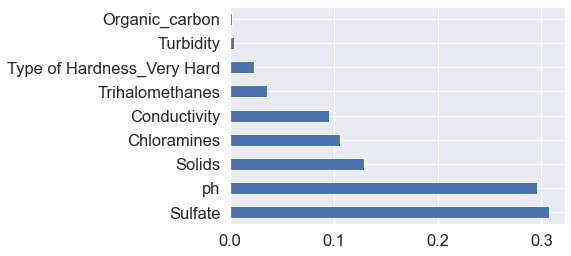

In [116]:
feat_imp_DT = pd.Series(DT_clf.feature_importances_, index=X_train.columns)
feat_imp_DT.nlargest(9).plot(kind='barh') 

In [117]:
important_feat = list(feat_imp_DT.nlargest(5).index)
important_feat

['Sulfate', 'ph', 'Solids', 'Chloramines', 'Conductivity']

In [118]:
X_train_imp = X_train.loc[:,important_feat] 
X_test_imp = X_test.loc[:,important_feat]

In [119]:
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sulfate       2620 non-null   float64
 1   ph            2620 non-null   float64
 2   Solids        2620 non-null   float64
 3   Chloramines   2620 non-null   float64
 4   Conductivity  2620 non-null   float64
dtypes: float64(5)
memory usage: 102.5 KB


In [120]:
grid_search.fit(X_train_imp, Y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 8, 12, 15, 20],
                         'min_samples_split': [0.01, 0.05, 0.1]},
             scoring='accuracy', verbose=1)

In [121]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 0.01}

In [122]:
grid_search.best_score_

0.633969465648855

In [123]:
DT_clf_imp = DecisionTreeClassifier(max_depth = 8, max_features = 'auto', min_samples_leaf = 8, min_samples_split=0.01,random_state=20)

In [124]:
DT_clf_imp.fit(X_train_imp, Y_train)

DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=8,
                       min_samples_split=0.01, random_state=20)

In [125]:
Y_pred_imp = DT_clf_imp.predict(X_test_imp)

In [126]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_imp)))

Model accuracy score: 0.5991


In [127]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_imp)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5364748110953085

In [128]:
print(confusion_matrix(Y_test, Y_pred_imp))
print(classification_report(Y_test, Y_pred_imp))

[[335  58]
 [205  58]]
              precision    recall  f1-score   support

           0       0.62      0.85      0.72       393
           1       0.50      0.22      0.31       263

    accuracy                           0.60       656
   macro avg       0.56      0.54      0.51       656
weighted avg       0.57      0.60      0.55       656



# Random Forest

In [129]:
param_grid_RF = { 
    'n_estimators': [300,400,500,600,700,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [130]:
RFC = RandomForestClassifier(random_state=20)

In [131]:
Grid_rf= GridSearchCV(estimator=RFC, param_grid=param_grid_RF, cv= 5,n_jobs=-1,verbose =1,scoring='roc_auc')
Grid_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 400, 500, 600, 700, 800]},
             scoring='roc_auc', verbose=1)

In [132]:
Grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 600}

In [133]:
Grid_rf.best_score_

0.6328652763071068

In [134]:
RF = RandomForestClassifier(n_estimators=600,max_features='auto',max_depth=10,criterion='entropy', random_state=20 ,verbose = 1)

In [135]:
RF.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    3.3s finished


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=600,
                       random_state=20, verbose=1)

In [136]:
y_pred_RF = RF.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test,y_pred_RF)))

Model accuracy score: 0.6494


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


<AxesSubplot:>

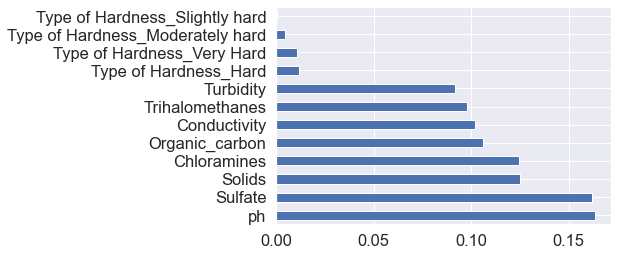

In [137]:
feat_imp_RF = pd.Series(RF.feature_importances_, index=X_train.columns)
feat_imp_RF.nlargest(15).plot(kind='barh') 

In [138]:
feat_imp_RF.nlargest(5)

ph                0.163328
Sulfate           0.162001
Solids            0.124805
Chloramines       0.124396
Organic_carbon    0.106074
dtype: float64

In [139]:
important_feat = list(feat_imp_RF.nlargest(5).index)
important_feat

['ph', 'Sulfate', 'Solids', 'Chloramines', 'Organic_carbon']

In [140]:
X_train_imp = X_train.loc[:,important_feat] 
X_test_imp = X_test.loc[:,important_feat]

In [141]:
Grid_rf= GridSearchCV(estimator=RFC, param_grid=param_grid_RF, cv= 5,n_jobs=-1,verbose =1,scoring='roc_auc')
Grid_rf.fit(X_train_imp, Y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 400, 500, 600, 700, 800]},
             scoring='roc_auc', verbose=1)

In [142]:
Grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 300}

In [143]:
Grid_rf.best_score_

0.6541135306845909

In [144]:
RF = RandomForestClassifier(n_estimators=300,max_features='auto',max_depth=3,criterion='entropy', random_state=20 ,verbose = 1)

In [145]:
RF.fit(X_train_imp, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.8s finished


RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=300,
                       random_state=20, verbose=1)

In [146]:
Y_pred_imp = RF.predict(X_test_imp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


In [147]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_imp)))

Model accuracy score: 0.6204


In [148]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_imp)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5272448456351164

In [149]:
print(confusion_matrix(Y_test, Y_pred_imp))
print(classification_report(Y_test, Y_pred_imp))

[[392   1]
 [248  15]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       393
           1       0.94      0.06      0.11       263

    accuracy                           0.62       656
   macro avg       0.78      0.53      0.43       656
weighted avg       0.74      0.62      0.50       656



### WIthout standardizing

In [109]:
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1:]

In [110]:
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1:]

# XG BOOST

In [150]:
import xgboost as xgb
from xgboost import XGBClassifier

In [151]:
xgb_model = XGBClassifier( random_state=20,learning_rate=0.01,eval_metric='auc')
# fit the model with the training data
xgb_model.fit(X_train,Y_train)

C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=20, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [152]:
y_pred_xgb = xgb_model.predict(X_test)

In [153]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test,y_pred_xgb)))

Model accuracy score: 0.6479


<AxesSubplot:>

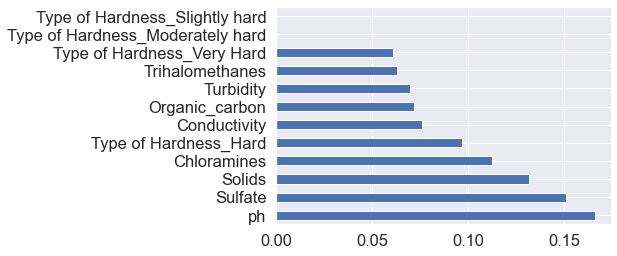

In [154]:
feat_imp_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feat_imp_xgb.nlargest(15).plot(kind='barh') 

In [155]:
imp_feat_xgb = list(feat_imp_xgb.nlargest(5).index)
imp_feat_xgb

['ph', 'Sulfate', 'Solids', 'Chloramines', 'Type of Hardness_Hard']

In [156]:
X_train_xgb = X_train.loc[:,imp_feat_xgb] 
X_test_xgb = X_test.loc[:,imp_feat_xgb]

In [157]:
X_test_xgb

,ph,Sulfate,Solids,Chloramines,Type of Hardness_Hard
0,5.800034,374.357784,13028.688458,6.106765,0
1,6.848033,373.206834,6068.454885,6.132132,1
2,7.065913,298.226719,27776.180257,7.589869,0
3,6.519848,373.091575,14284.647917,8.389078,0
4,5.499788,322.516582,43195.473668,6.570596,1
...,...,...,...,...,...
651,7.065913,333.840808,25703.155201,7.287310,1
652,5.893103,341.256362,20526.666156,6.349561,0
653,7.065913,333.840808,20557.240432,8.187319,1
654,6.492639,349.404057,14625.561363,7.736570,1


In [158]:
params_xgb = {
    'max_depth': [4,5,6,7,8],
    'n_estimators': [300,400,500,600,700],
    'learning_rate': [0.1, 0.01, 0.05],
    'subsample':[i/10.0 for i in range(6,8)],
    'gamma':[i/10.0 for i in range(0,3)],
}

In [161]:
estimator = XGBClassifier(
    random_state=20,
)

In [162]:
grid_search_xgb = GridSearchCV(estimator=estimator, 
                           param_grid=params_xgb, 
                           cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_xgb, Y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


C:\Users\thanu\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=20,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [163]:
grid_search_xgb.best_params_

{'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 400,
 'subsample': 0.6}

In [164]:
grid_search_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=20,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [165]:
final_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=400, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=20, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [166]:
final_xgb.fit(X_train_xgb, Y_train)

[22:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=20, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [167]:
y_pred_xgb = final_xgb.predict(X_test_xgb)

In [168]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_xgb)))

Model accuracy score: 0.6646


In [169]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6069040915643533

In [170]:
print(confusion_matrix(Y_test, y_pred_xgb))
print(classification_report(Y_test, y_pred_xgb))

[[353  40]
 [180  83]]
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       393
           1       0.67      0.32      0.43       263

    accuracy                           0.66       656
   macro avg       0.67      0.61      0.60       656
weighted avg       0.67      0.66      0.63       656



In [131]:
import pickle

In [133]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(final_xgb, open(filename, 'wb'))

In [134]:
# load the model from disk
filename = 'finalized_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_xgb, Y_test)
print(result)

0.6905487804878049
